# Pymaceuticals Inc.
---

### Analysis

- This analysis evalutes the effectivness of different drug regimens that reduce tumor volume in mice. The dataset has information of mouse sex, age, weight, tumor volume, and timepoints throught the treatments. After analyzing the data, multiple observations were made:
- 1. When looking at the box plot on the distributon of each tumor during treatment, Ramicane and Campomulin have the lowest tumor volumes. These two drugs also have the most timepoints when comparing to others. This suggests that Ramicane and Campomulin may be more effective in reducing tumor volume over time.
  2. The distribution between male and female mice is relatively similar, and almost equal percentages. This suggets that gender is not a large influence on the effectiveness of various drug regimes on mice tumor volume.
  3. The scatter plot that displays mice weight compared to the average tumor volume shows an increase in average tumor volume as mouse weight increases. This suggests that the heavier the mouse, the larger the tumor volume.
  4. The Campomulin line graph shows a decrease in tumor volume as the timepoints increase. This suggests that with time, Campomulin significnalty reduced tumor volume in mice and is an effective drug. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print("Preview of Merged Data:")
merged_df.head()


Preview of Merged Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = merged_df['Mouse ID'].nunique()
print("Number of Unique Mice:")
print(mice_count)

Number of Unique Mice:
249


In [4]:
# Filter data for the duplicate Mouse ID
duplicate_mouse_data = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mouse_data["Mouse ID"].unique()

# Display the table
print("Data for duplicate Mouse ID:")
print(duplicate_mouse_ids)

Data for duplicate Mouse ID:
['g989']


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_df.drop_duplicates(subset=["Mouse ID" , "Timepoint"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_data['Mouse ID'].nunique()
print(number_of_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_err_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame ({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":std_dev_tumor,
    "Tumor Volume Std. Err.":std_err_tumor})

#Print the Data
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = cleaned_data.groupby("Drug Regimen")
advanced_summary_statistics = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

#Print the Data
advanced_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

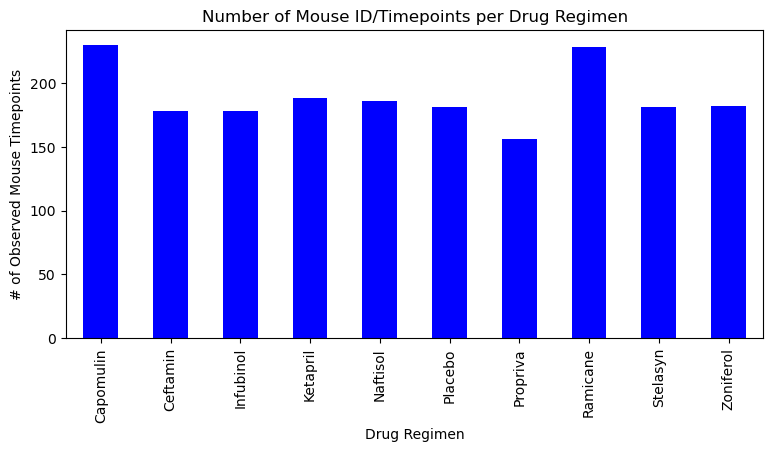

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data = cleaned_data.groupby("Drug Regimen")
mouse_id_count = grouped_data["Mouse ID"].count()
mouse_id_count.plot(kind="bar", figsize=(9,4), color="blue") 

plt.title("Number of Mouse ID/Timepoints per Drug Regimen") 
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show


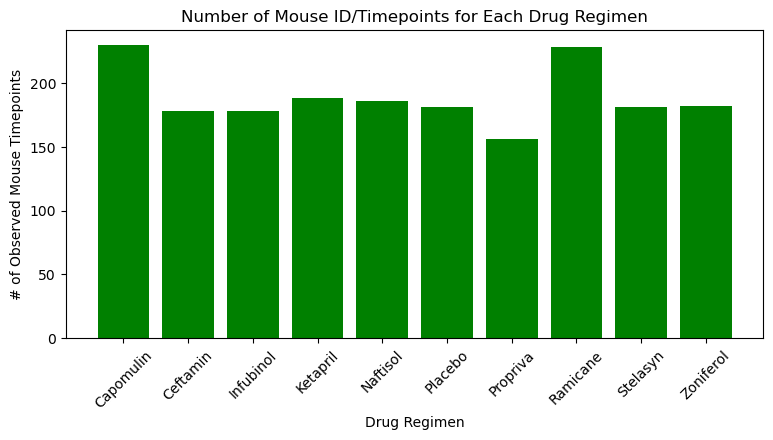

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_data = cleaned_data.groupby("Drug Regimen")
mouse_id_count = grouped_data["Mouse ID"].count()
plt.figure(figsize=(9,4))
plt.bar(mouse_id_count.index, mouse_id_count.values,color="green")

plt.title("Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints") 
plt.xticks(rotation=45)
plt.show()

                                    

<function matplotlib.pyplot.show(close=None, block=None)>

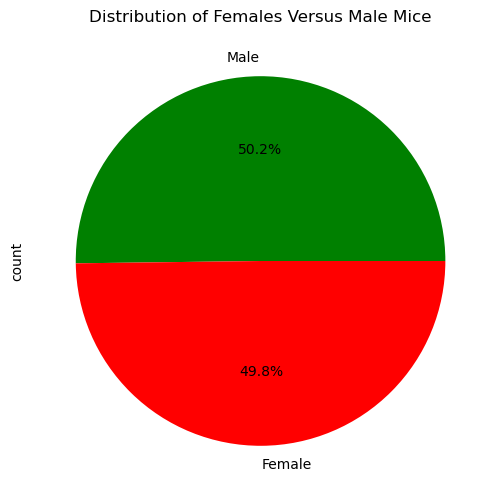

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])
# Get the unique mice with their gender
gender_count = unique_mice["Sex"].value_counts()
# Make the pie chart
gender_count.plot.pie(autopct="%1.1f%%", startangle=0, figsize=(6, 6), colors=["green", "red"])
plt.title("Distribution of Females Versus Male Mice")
plt.show


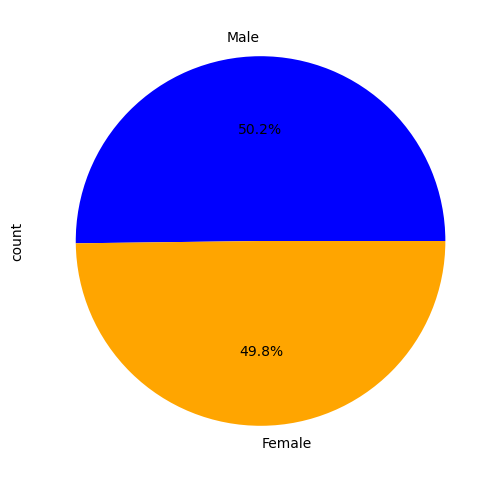

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])
gender_count = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_count.plot.pie(autopct="%1.1f%%", startangle=0, figsize=(6, 6), colors=["blue", "orange"])
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
merged_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_last_timepoint[merged_last_timepoint["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    
    # add subset
    tumor_volume_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(treatment)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(outliers)




Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


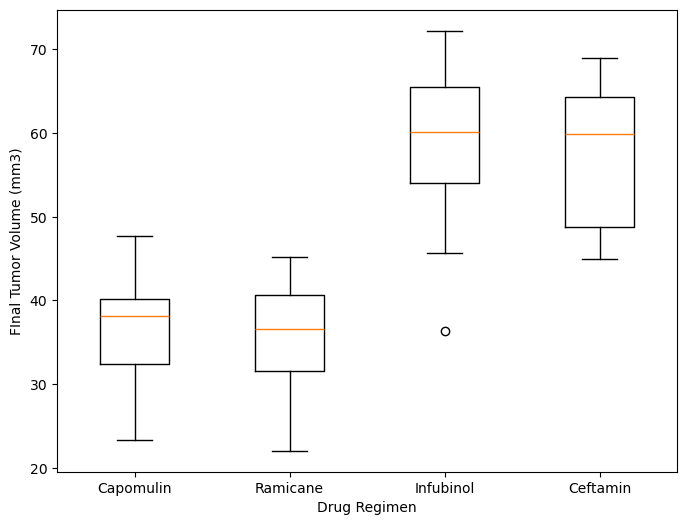

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(tumor_volume_data, labels=treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("FInal Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

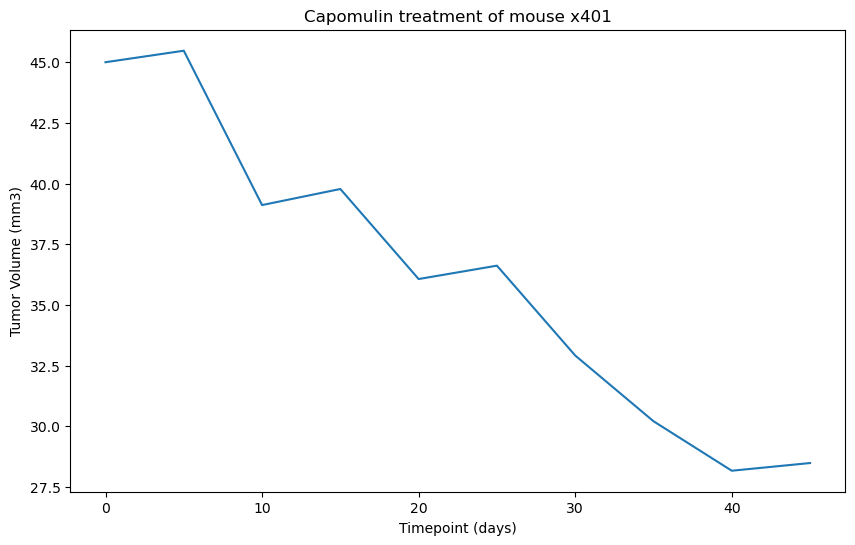

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"]== "Capomulin") & (cleaned_data["Mouse ID"]== "x401")]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")



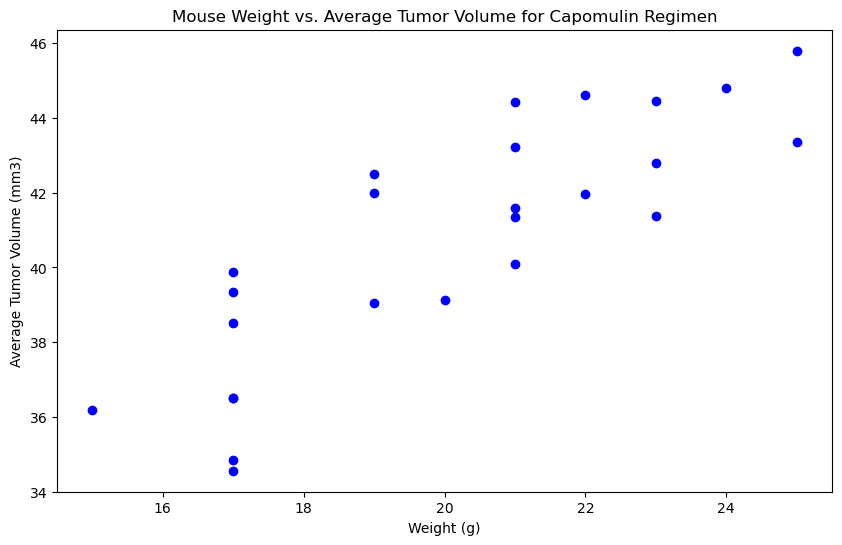

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"]== "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
avg_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)
merged_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata, on="Mouse ID")
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_with_weight["Weight (g)"], merged_data_with_weight["Average Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

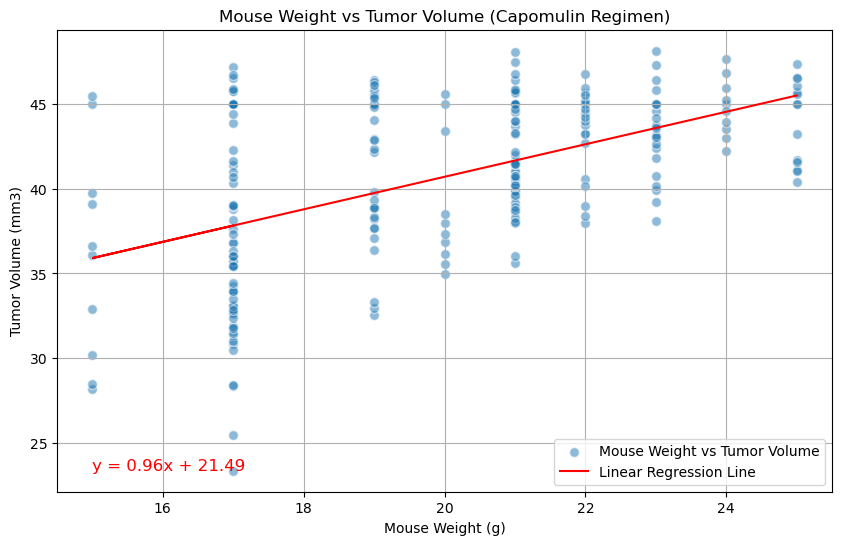

Correlation Coefficient: 0.53


In [31]:
from scipy.stats import linregress


# Calculate correlation coefficient
correlation_coefficient = capomulin_data["Weight (g)"].corr(capomulin_data["Tumor Volume (mm3)"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
regress_values = capomulin_data["Weight (g)"] * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], 
            label="Mouse Weight vs Tumor Volume", alpha=0.5, edgecolor='w', s=50)  
plt.plot(capomulin_data['Weight (g)'], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (capomulin_data['Weight (g)'].min(), capomulin_data['Tumor Volume (mm3)'].min()), 
             fontsize=12, color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")